# Stochastic Oscillator

In [1]:
import pandas_datareader as pdr
import datetime as dt
import quandl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import requests
from termcolor import colored as cl
from math import floor
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')


ticker0 = quandl.get("EOD/AAPL", authtoken="YA4KnPAgb7_ouvkkyxKs")
print(ticker0.size )
# ticker = ticker0.iloc[-250:]

ticker = ticker0

# Dataframe must have High Low and Close of assest to execute properly
# Resource used
# https://www.learnpythonwithrune.org/pandas-calculate-the-stochastic-oscillator-indicator-for-stocks/

def stochastic_oscillator(ticker):
    ticker['14-high'] = ticker['High'].rolling(14).max()
    ticker['14-low'] = ticker['Low'].rolling(14).min()
    ticker['%K'] = (ticker['Close'] - ticker['14-low'])*100/(ticker['14-high'] - ticker['14-low'])
    ticker['%D'] = ticker['%K'].rolling(3).mean()


    ax = ticker[['%K', '%D']].plot()
    ticker['Adj_Close'].plot(ax=ax, secondary_y=True)
    ax.axhline(20, linestyle='--', color="r")
    ax.axhline(80, linestyle="--", color="r")
    plt.show()
    
def plot_stoch(symbol, price, k, d):
    ax1 = plt.subplot2grid((9, 1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((9, 1), (6,0), rowspan = 3, colspan = 1)
    ax1.plot(price)
    ax1.set_title(f'{symbol} STOCK PRICE')
    ax2.plot(k, color = 'deepskyblue', linewidth = 1.5, label = '%K')
    ax2.plot(d, color = 'orange', linewidth = 1.5, label = '%D')
    ax2.axhline(80, color = 'black', linewidth = 1, linestyle = '--')
    ax2.axhline(20, color = 'black', linewidth = 1, linestyle = '--')
    ax2.set_title(f'{symbol} STOCH')
    ax2.legend()
    plt.show()
    
def implement_stoch_strategy(prices, k, d):    
    buy_price = []
    sell_price = []
    stoch_signal = []
    signal = 0

    for i in range(len(prices)):
        if k[i] < 20 and d[i] < 20 and k[i] < d[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        elif k[i] > 80 and d[i] > 80 and k[i] > d[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            stoch_signal.append(0)
            
    return buy_price, sell_price, stoch_signal

def plot_sell_buy(ticker, buy_price, sell_price, stoch_signal):
    ax1 = plt.subplot2grid((9, 1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((9, 1), (6,0), rowspan = 3, colspan = 1)
    ax1.plot(ticker['Close'], color = 'skyblue', label = 'AALP')
    ax1.plot(ticker.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
    ax1.plot(ticker.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
    ax1.legend(loc = 'upper left')
    ax1.set_title('AALP STOCK PRICE')
    ax2.plot(ticker['%K'], color = 'deepskyblue', linewidth = 1.5, label = '%K')
    ax2.plot(ticker['%D'], color = 'orange', linewidth = 1.5, label = '%D')
    ax2.axhline(80, color = 'black', linewidth = 1, linestyle = '--')
    ax2.axhline(20, color = 'black', linewidth = 1, linestyle = '--')
    ax2.set_title('AALP STOCH')
    ax2.legend()
    plt.show()
    

        



Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


13080


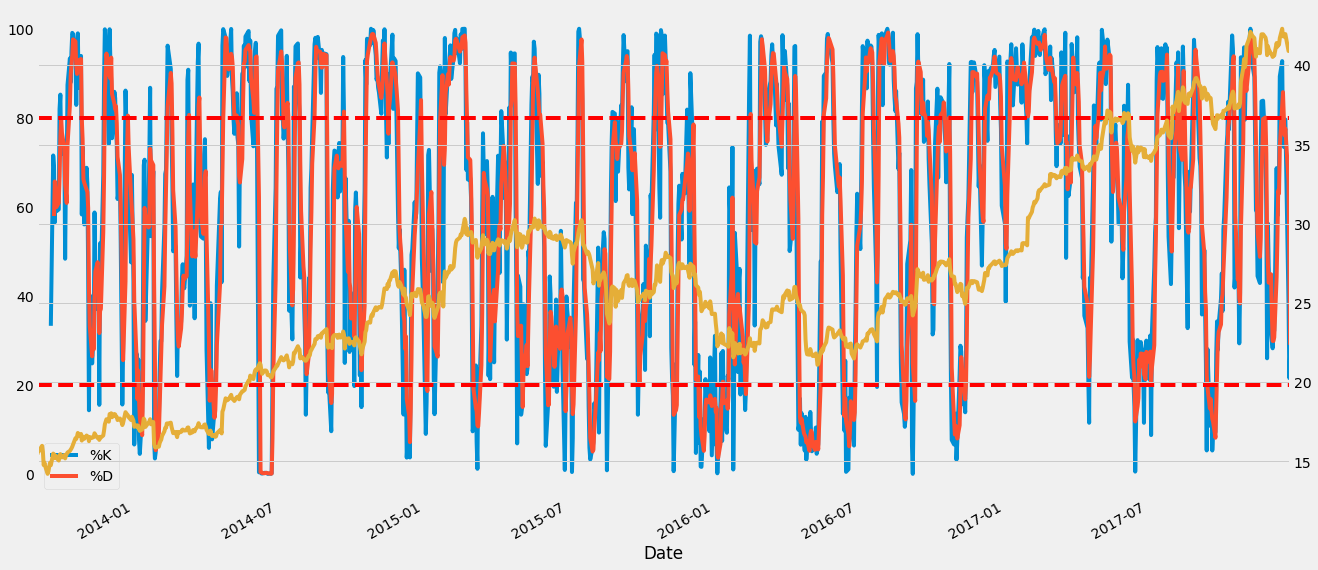

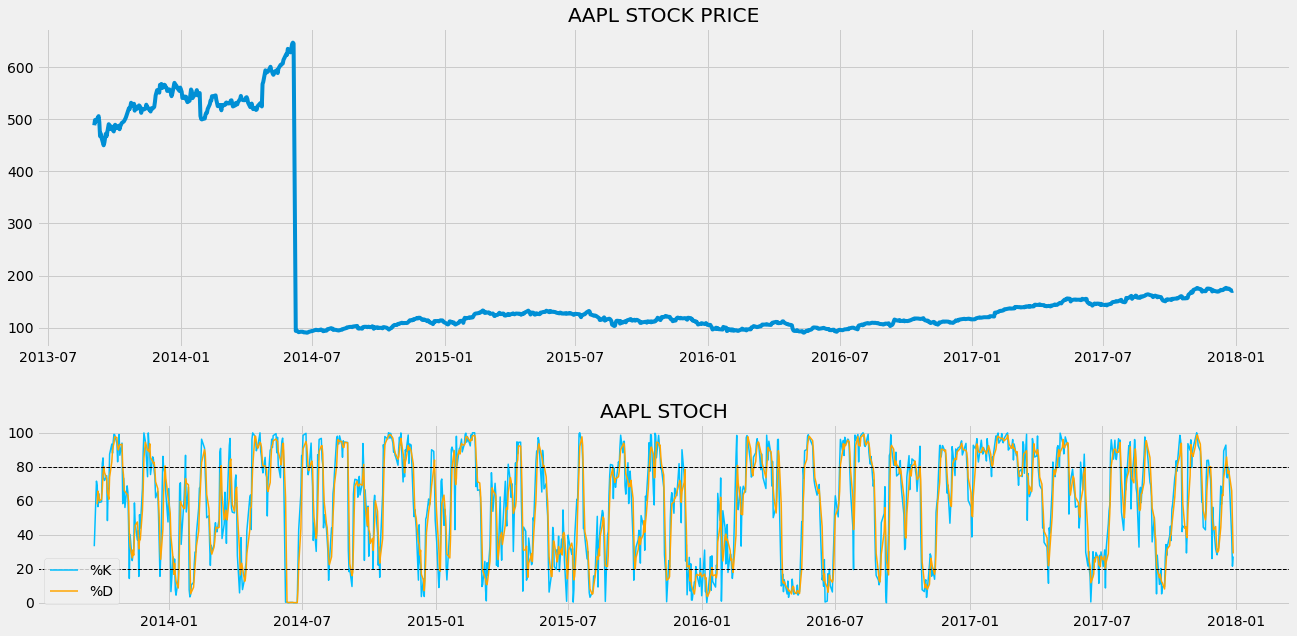

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,14-high,14-low,%K,%D
Date,,,,,,,,,,,,,,,,
2017-12-20,174.87,175.420,173.250,174.35,23475649.0,0.0,1.0,41.934151,42.066042,41.545672,41.809454,93902596.0,177.2,166.46,73.463687,80.477964
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.766290,42.209923,41.749504,41.967723,83799584.0,177.2,166.46,79.608939,76.101800
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.888589,42.067001,41.845424,41.967723,65397776.0,177.2,166.46,79.608939,77.560521
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,40.958157,41.118825,40.689340,40.903003,132742144.0,177.2,166.46,38.268156,65.828678
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.790296,40.953361,40.696773,40.910197,85992852.0,177.2,168.79,21.521998,46.466364
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.006118,41.209949,40.881421,41.025302,65920748.0,177.2,168.79,27.229489,29.006548


In [2]:
stochastic_oscillator(ticker)
plot_stoch('AAPL', ticker['Close'], ticker['%K'],ticker['%D'])
ticker.tail(6)

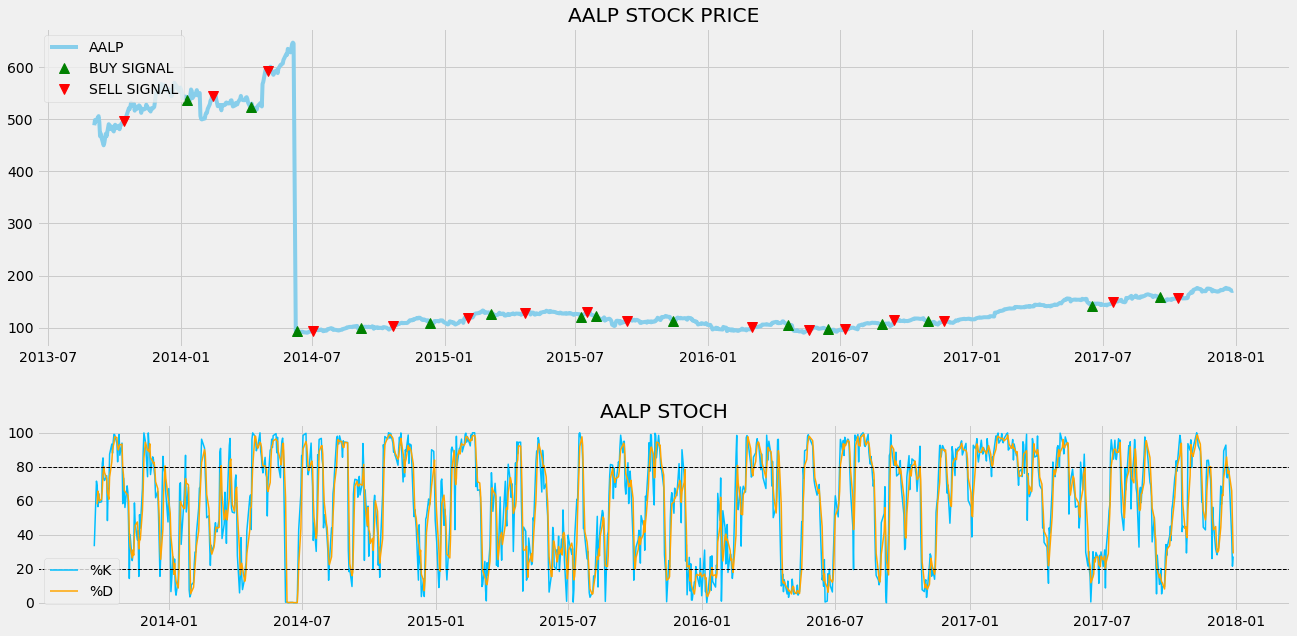

In [3]:
buy_price, sell_price, stoch_signal = implement_stoch_strategy(ticker['Close'], ticker['%K'], ticker['%D'])
plot_sell_buy(ticker, buy_price, sell_price, stoch_signal)

In [4]:
# running on pyvizen or algo 


In [5]:
# pip install alpaca-trade-api 
# worked

In [6]:
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import os
import pandas as pd


load_dotenv('../../api_keys.env')

# authentication and connection details
# print(os.getenv("ALPACA_API_KEY"))
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'

# instantiate REST API
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

# obtain account information
account = api.get_account()
print(account)

Python-dotenv could not parse statement starting at line 11


Account({   'account_blocked': False,
    'account_number': 'PA34KCEAABFP',
    'buying_power': '400000',
    'cash': '100000',
    'created_at': '2021-04-15T22:44:35.920181Z',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '400000',
    'equity': '100000',
    'id': '119344c9-e995-4f4d-8fb7-0b355b8e7cdb',
    'initial_margin': '0',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '0',
    'maintenance_margin': '0',
    'multiplier': '4',
    'pattern_day_trader': True,
    'portfolio_value': '100000',
    'regt_buying_power': '200000',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '0',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})


In [7]:
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# tickers = ["FB", "TWTR", 'AAPL']
tickers = ['AAPL']

timeframe = "1D"

# aapl = api.get_barset('AAPL', 'day')
# aapl


In [8]:
# # Get current closing prices for FB and TWTR
# df_portfolio = api.get_barset(
#     tickers,
#     timeframe,
#     start = today,
#     end = today
# ).df

# # Display sample data
# df_portfolio

In [9]:
start = pd.Timestamp("2020-07-2", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-07-2", tz="America/New_York").isoformat()

In [10]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = api.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio_year.head(10)

AAPL                                      
                             open    high       low     close    volume
time                                                                   
2020-07-02 00:00:00-04:00  367.85  370.47  363.6500  364.1200  25332853
2020-07-06 00:00:00-04:00  370.00  375.78  369.8700  373.8100  26084791
2020-07-07 00:00:00-04:00  375.41  378.62  372.2300  372.6400  24610596
2020-07-08 00:00:00-04:00  376.72  381.50  376.3600  381.4400  26025692
2020-07-09 00:00:00-04:00  385.05  393.91  378.6900  382.6599  29212120
2020-07-10 00:00:00-04:00  381.34  383.92  378.8207  383.5200  20333748
2020-07-13 00:00:00-04:00  389.06  399.82  381.0300  381.9100  43528308
2020-07-14 00:00:00-04:00  379.36  389.02  375.5100  388.2100  37043531
2020-07-15 00:00:00-04:00  395.96  396.99  385.9600  390.9100  35722109
2020-07-16 00:00:00-04:00  386.25  389.62  383.6200  386.2300  25167794

In [11]:

# # Create and empty DataFrame for closing prices
# df_closing_prices = pd.DataFrame()

# # Fetch the closing prices of FB and TWTR
# df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
# df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# # Drop the time component of the date
# df_closing_prices.index = df_closing_prices.index.date

# # Display sample data
# df_closing_prices.head(10)

# Ichimoku Kinko Hyo Cloud


In [12]:
tenkan_window = 20
kijun_window = 60
senkou_span_b_window = 120
cloud_displacement = 30
chikou_shift = -30

def kijun_sen(df,kijun_window ):

    # Kijun 
    kijun_sen_high = df['High'].rolling( window=kijun_window ).max()
    kijun_sen_low = df['Low'].rolling( window=kijun_window ).min()
    df['kijun_sen'] = (kijun_sen_high + kijun_sen_low) / 2

    return df

In [13]:
def tenkan_sen(df,tenkan_window ):
    # Tenkan 
    tenkan_sen_high = df['High'].rolling( window=tenkan_window ).max()
    tenkan_sen_low = df['Low'].rolling( window=tenkan_window ).min()
    df['tenkan_sen'] = (tenkan_sen_high + tenkan_sen_low) /2
    
    return df

In [14]:
def Senkou_Span_A(df, cloud_displacement ):
    # Senkou Span A 
    df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(cloud_displacement)
    return df

In [15]:
def Senkou_Span_B(df, senkou_span_b_window):
    # Senkou Span B 
    senkou_span_b_high = df['High'].rolling( window=senkou_span_b_window ).max()
    senkou_span_b_low = df['Low'].rolling( window=senkou_span_b_window ).min()
    df['senkou_span_b'] = ((senkou_span_b_high + senkou_span_b_low) / 2).shift(cloud_displacement)
    return df

In [16]:
def Chikou(df, chikou_shift):
    # Chikou
    df['chikou_span']  = df["Close"].shift(chikou_shift)
    return df

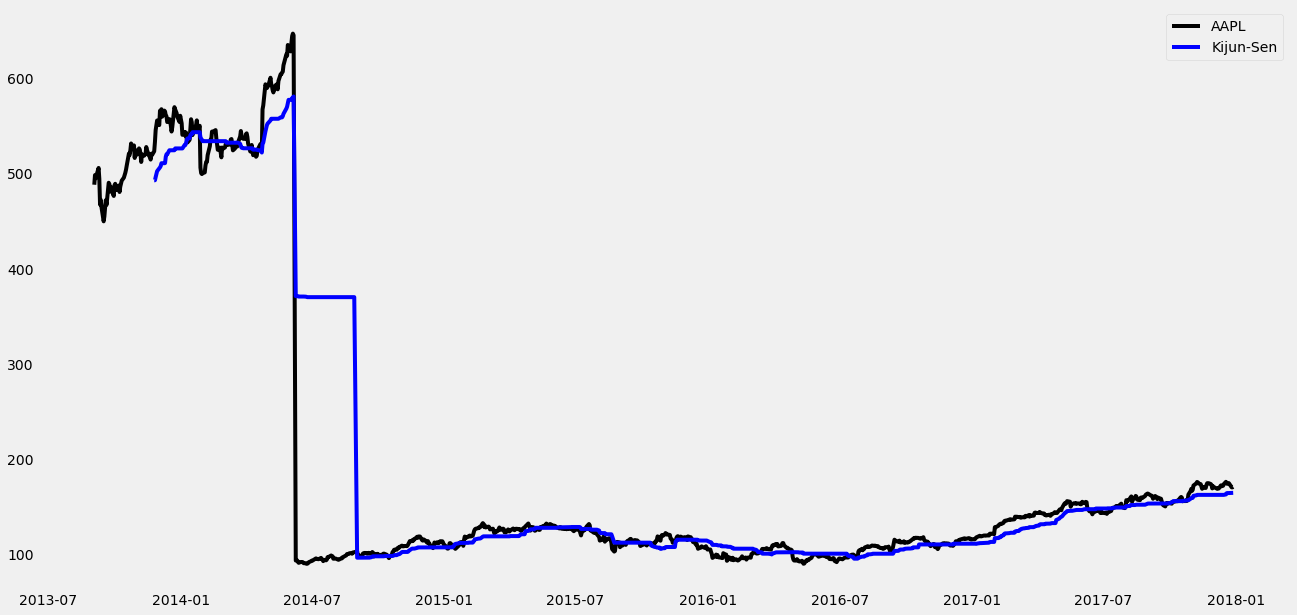

In [17]:
import matplotlib.pyplot as plt

def kijun_sen_plot(ticker,kijun_window):
    ticker = kijun_sen(ticker,kijun_window)
    # plt.plot(ticker[-250:, Close], color = 'black', label = 'EURUSD')
    plt.plot(ticker["Close"], color = 'black',label = "AAPL")
    # plt.plot(ticker[-250:, where], color = 'blue', label = 'Kijun-Sen')
    plt.plot(ticker["kijun_sen"], color = 'blue',label = "Kijun-Sen")
    plt.grid()
    plt.legend()
    
kijun_sen_plot(ticker,kijun_window)

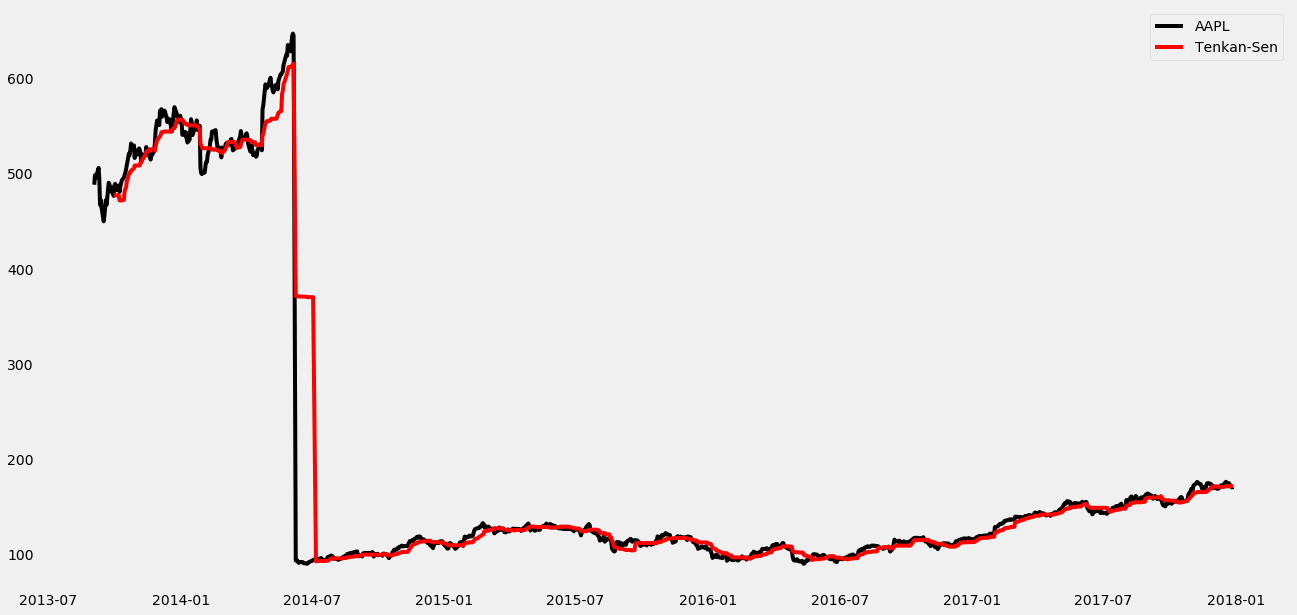

In [18]:
import matplotlib.pyplot as plt

def tenkan_sen_plot(ticker, tenkan_window ):
    ticker = tenkan_sen(ticker, tenkan_window )
    plt.plot(ticker["Close"], color = 'black', label = 'AAPL')
    plt.plot(ticker['tenkan_sen'], color = 'red', label = 'Tenkan-Sen')
    plt.grid()
    plt.legend()

tenkan_sen_plot(ticker, tenkan_window )

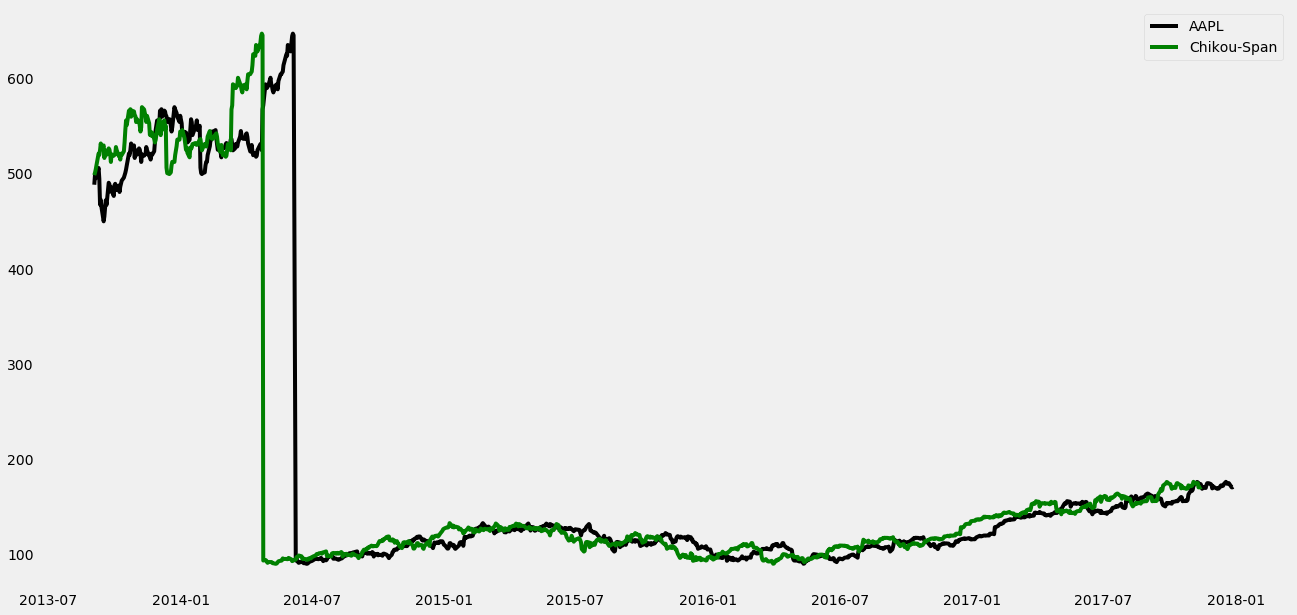

In [19]:
import matplotlib.pyplot as plt

def Chikou_plot(ticker, chikou_shift):
    ticker = Chikou(ticker, chikou_shift)
    plt.plot(ticker["Close"] , color = 'black', label = 'AAPL')
    plt.plot(ticker['chikou_span'] , color = 'green', label = 'Chikou-Span')
    plt.grid()
    plt.legend()

Chikou_plot(ticker, chikou_shift)

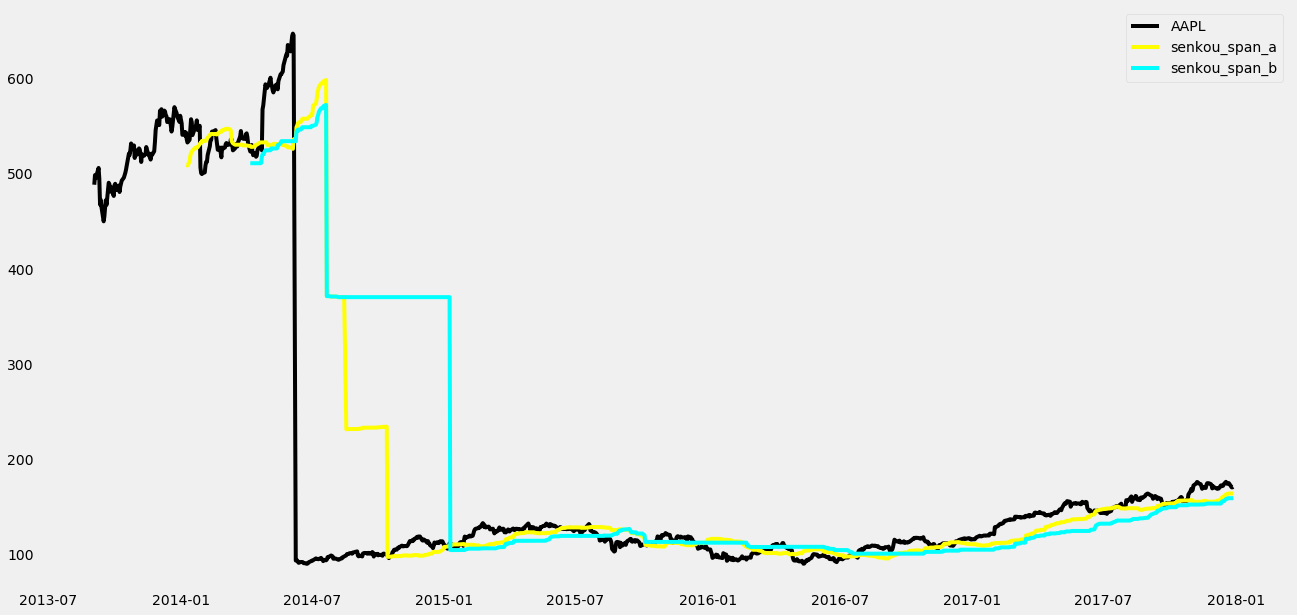

In [20]:
import matplotlib.pyplot as plt

def Senkou_Span_plot(ticker, senkou_span_b_window):
    ticker_span_b = Senkou_Span_B(ticker, senkou_span_b_window)
    ticker_span_a = Senkou_Span_A(ticker, cloud_displacement )
    plt.plot(ticker["Close"] , color = 'black', label = 'AAPL')
    plt.plot(ticker_span_b['senkou_span_a'] , color = 'yellow', label = 'senkou_span_a')
    plt.plot(ticker_span_b['senkou_span_b'] , color = 'cyan', label = 'senkou_span_b')
    plt.grid()
    plt.legend()
    
Senkou_Span_plot(ticker, senkou_span_b_window)

In [21]:
def plot_ichimoku(df,  view_limit=100): 
    d2 = df.loc[:, ['tenkan_sen','kijun_sen','senkou_span_a','senkou_span_b', 'chikou_span']]
    d2 = d2.tail(view_limit)
    date_axis = d2.index.values
    # ichimoku
    plt.plot(date_axis, d2['tenkan_sen'], label="tenkan", color='#0496ff', alpha=0.65,linewidth=1)
    plt.plot(date_axis, d2['kijun_sen'], label="kijun", color="#991515", alpha=0.65,linewidth=1)
    plt.plot(date_axis, d2['senkou_span_a'], label="span a", color="#008000", alpha=0.65,linewidth=1)
    plt.plot(date_axis, d2['senkou_span_b'], label="span b", color="#ff0000", alpha=0.65, linewidth=1)
    plt.plot(date_axis, d2['chikou_span'], label="chikou", color="#ffffff", alpha=0.65, linewidth=1)
    # green cloud
    ax.fill_between(date_axis, d2['senkou_span_a'], d2['senkou_span_b'], where=d2['senkou_span_a']> d2['senkou_span_b'], facecolor='#008000', interpolate=True, alpha=0.25)
    # red cloud
    ax.fill_between(date_axis, d2['senkou_span_a'], d2['senkou_span_b'], where=d2['senkou_span_b']> d2['senkou_span_a'], facecolor='#ff0000', interpolate=True, alpha=0.25)

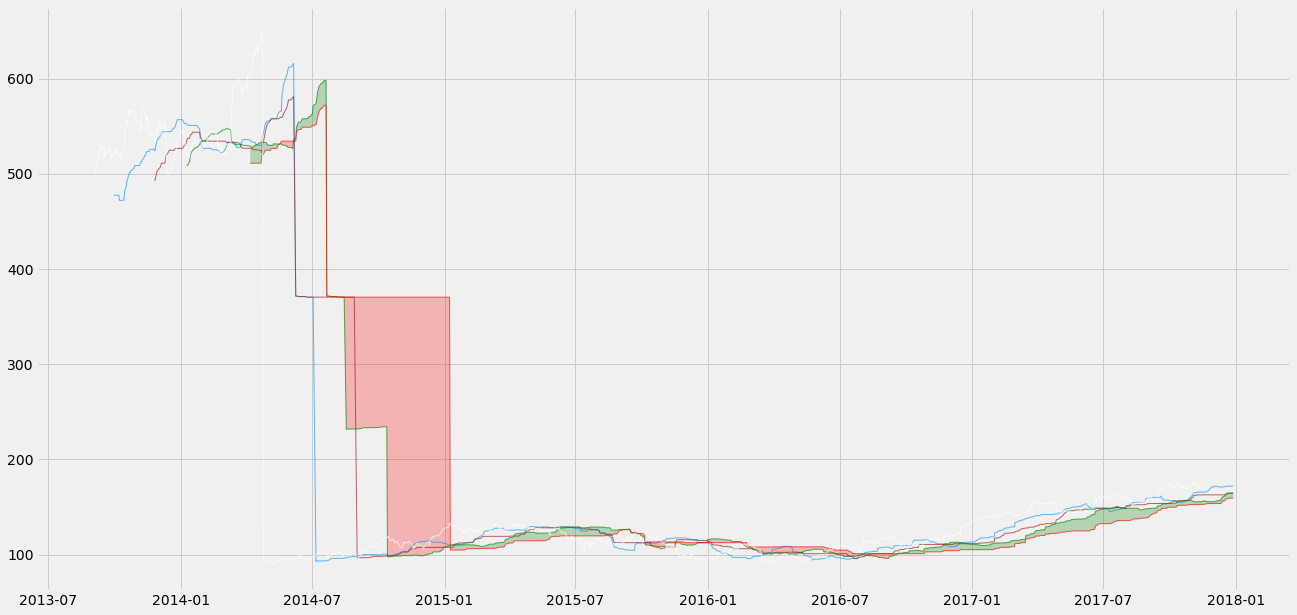

In [22]:

fig, ax = plt.subplots() 
plot_ichimoku(ticker, view_limit=1300)


# Fibonacci Levels

### Emmanuel Constant 

In [23]:
def get_fib_retracement_levels(data):
    """
    Helper function to calculate the fibonacci retracement levels
    """
    #Fibonacci retracement levels ratios
    retracement_levels = [0.236, 0.382, 0.5 , 0.618]
    
    #min and max of Close price
    closePriceMax = data['Close'].max()
    closePriceMin = data['Close'].min()
    
    #the difference between max and min Close Price (total up/down move)
    diff = closePriceMax - closePriceMin
    
    
    
    #calculation of price per retracement levels ratios
    level_1 = closePriceMax - retracement_levels[0] * diff
    level_2 = closePriceMax - retracement_levels[1] * diff
    level_3 = closePriceMax - retracement_levels[2] * diff
    level_4 = closePriceMax - retracement_levels[3] * diff
    
    #Print the price at each level
    print("Level Percentage\t", "Price ($)")
    print("00.0%\t\t", closePriceMax)
    print("23.6%\t\t", level_1)
    print("38.2%\t\t", level_2)
    print("50.0%\t\t", level_3)
    print("61.8%\t\t", level_4)
    print("100.0%\t\t", closePriceMin)
    
    data['fib_close_min'] = closePriceMin
    data['fib_level_1'] = level_1
    data['fib_level_2'] = level_2
    data['fib_level_3'] = level_3
    data['fib_level_4'] = level_4
    data['fib_close_max'] = closePriceMax

    
    
#     return data, closePriceMin, level_1, level_2, level_3, level_4, closePriceMax
    return data

In [24]:
# closePriceMin, level_1, level_2, level_3, level_4, closePriceMax = get_fib_retracement_levels(ticker)
data = get_fib_retracement_levels(ticker)
ticker.head()

Level Percentage	 Price ($)
00.0%		 647.35
23.6%		 515.88148
38.2%		 434.54926
50.0%		 368.815
61.8%		 303.08074
100.0%		 90.28


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,tenkan_sen,chikou_span,senkou_span_b,senkou_span_a,fib_close_min,fib_level_1,fib_level_2,fib_level_3,fib_level_4,fib_close_max
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.569965,15.806782,15.388405,...,NaN,498.680,NaN,NaN,90.28,515.88148,434.54926,368.815,303.08074,647.35
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.773944,15.858566,15.670375,...,NaN,501.114,NaN,NaN,90.28,515.88148,434.54926,368.815,303.08074,647.35
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.795731,15.809308,15.587016,...,NaN,504.500,NaN,NaN,90.28,515.88148,434.54926,368.815,303.08074,647.35
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.738579,15.768260,15.470501,...,NaN,508.890,NaN,NaN,90.28,515.88148,434.54926,368.815,303.08074,647.35
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.945715,16.037916,15.897720,...,NaN,521.362,NaN,NaN,90.28,515.88148,434.54926,368.815,303.08074,647.35


In [25]:
# https://medium.datadriveninvestor.com/fibonacci-retracement-a-stock-trading-strategy-using-python-e1d4e5dfb97f
def fib_retracement_plot(df, closePriceMin, level_1, level_2, level_3, level_4, closePriceMax):

    new_df = df
    plt.figure(figsize=(12.33,4.5))
    ax = fig.add_subplot(1,1,1)
    
    plt.title('Fibonnacci Retracement Plot')
    plt.plot(new_df.index, new_df['Close'])
    
    plt.axhline(closePriceMax, linestyle='--', alpha=0.5, color = 'red')
    plt.fill_between(df.index, closePriceMax, level_1, color = 'red')
    
    plt.axhline(level_1, linestyle='--', alpha=0.5, color = 'orange')
    plt.fill_between(df.index, level_1, level_2, color = 'orange')
    
    plt.axhline(level_2, linestyle='--', alpha=0.5, color = 'yellow')
    plt.fill_between(df.index, level_2, level_3, color = 'yellow')
    
    plt.axhline(level_3, linestyle='--', alpha=0.5, color = 'green')
    plt.fill_between(df.index, level_3, level_4, color = 'green')
    
    plt.axhline(level_4, linestyle='--', alpha=0.5, color = 'blue')
    plt.fill_between(df.index, level_4, closePriceMin, color = 'blue')
    
    plt.axhline(closePriceMin, linestyle='--', alpha=0.5, color = 'purple')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price in USD',fontsize=18)
    plt.show()

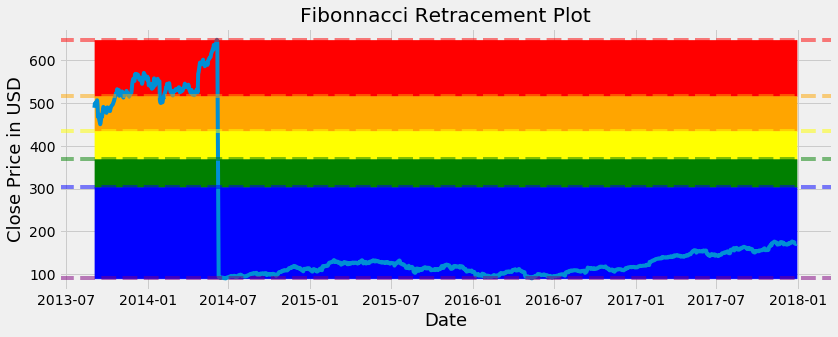

In [26]:
fib_retracement_plot(
    ticker,
    ticker['fib_close_min'][0],
    ticker['fib_level_1'][0],
    ticker['fib_level_2'][0], 
    ticker['fib_level_3'][0],
    ticker['fib_level_4'][0],
    ticker['fib_close_max'][0])
